# Influential Analysis of Social Media Sites: Youtube, Instagram and Tiktok.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [4]:
df_t=pd.read_csv('/content/social media influencers - tiktok.csv')
df_i=pd.read_csv('/content/social media influencers - instagram.csv')
df_y=pd.read_csv('/content/social media influencers - youtube.csv')

# Tiktok Analysis

In [5]:
df_t.head(10)

,Tiktoker name,Tiktok name,Subscribers count,Views avg.,Likes avg,Comments avg.,Shares avg
0,ekin.721,MOMO’s,221.7K,26M,2.8M,29.4K,116.4K
1,dojacat,Doja Cat,22.2M,25.4M,5M,36.7K,46.8K
2,kiet.ac.quy,Kiệt Ắk Wỷ,2.1M,20.7M,3.5M,38.8K,33.9K
3,charlidamelio,charli d’amelio,135.4M,18.7M,2.6M,54.7K,35.2K
4,luvadepedreiro,Iran Ferreira (Lai),11.4M,24.8M,2.6M,32.7K,26.8K
5,badbunny,Bad Bunny,16.1M,17.6M,4M,28K,26.2K
6,khaby.lame,Khabane lame,135.2M,17.7M,2.3M,18K,11.2K
7,leomahalo,Leo Mahalo,6.8M,19M,2.2M,11.8K,14.4K
8,swagboygorringe,Daniel Gorringe,5.6M,9.9M,1.8M,25.3K,35.9K
9,jennmelon,Jenn Melon,2M,11M,2.3M,15.1K,24.5K


In [6]:
df_t.isnull().sum()

Tiktoker name        0
Tiktok name          2
Subscribers count    0
Views avg.           0
Likes avg            0
Comments avg.        0
Shares avg           0
dtype: int64

In [7]:
df_t['Subscribers count'].str[-1].value_counts()

M    797
K    203
Name: Subscribers count, dtype: int64

In [8]:
import re
def convert(x):
    return re.findall('\d+\.?\d*',x)

In [9]:
def change(df,list1):
    for i in list1:
        df['new'+i]=df[i].apply(convert)
        df['new'+i]=df['new'+i].apply(lambda x: "".join(x))
        df['new'+i]=pd.to_numeric(df['new'+i])
        df['new'+i]=np.where(['M' in j for j in df[i]],df['new'+i]*1000000,
                             np.where(['K' in j1 for j1 in df[i]],df['new'+i]*1000,df['new'+i]))
    return df

In [10]:
change(df_t,['Subscribers count'])

,Tiktoker name,Tiktok name,Subscribers count,Views avg.,Likes avg,Comments avg.,Shares avg,newSubscribers count
0,ekin.721,MOMO’s,221.7K,26M,2.8M,29.4K,116.4K,221700.0
1,dojacat,Doja Cat,22.2M,25.4M,5M,36.7K,46.8K,22200000.0
2,kiet.ac.quy,Kiệt Ắk Wỷ,2.1M,20.7M,3.5M,38.8K,33.9K,2100000.0
3,charlidamelio,charli d’amelio,135.4M,18.7M,2.6M,54.7K,35.2K,135400000.0
4,luvadepedreiro,Iran Ferreira (Lai),11.4M,24.8M,2.6M,32.7K,26.8K,11400000.0
...,...,...,...,...,...,...,...,...
995,nicolebernaal,nicolebernaal,4M,2.2M,351.3K,957,195,4000000.0
996,bellaretamosa,bella,5.1M,2.5M,340.4K,901,145,5100000.0
997,tunico80,🌠Antonio Tonon🌠,5.8M,1M,206.8K,2K,2.1K,5800000.0
998,armon.warren,Armoney,1.2M,1.9M,300.8K,904,630,1200000.0


TOP 10 most followed celebrity on Tiktok

In [11]:
df_t.sort_values(by='newSubscribers count',ascending=False,ignore_index=True).iloc[0:10,[1,2]]

,Tiktok name,Subscribers count
0,charli d’amelio,135.4M
1,Khabane lame,135.2M
2,Bella Poarch,88.5M
3,Addison Rae,87.3M
4,Will Smith,67.4M
5,Kimberly Loaiza,61M
6,dixie,57.2M
7,Loren Gray,54.3M
8,Dominik,50.7M
9,Kris HC,43.3M


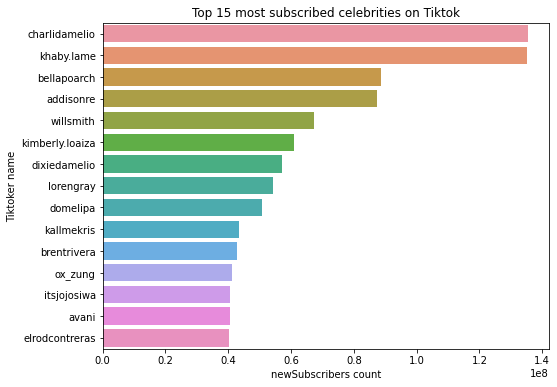

In [12]:
plt.figure(figsize =(8, 6))
plt.title('Top 15 most subscribed celebrities on Tiktok')
plt.xlabel('Subscribers in Million')
sns.barplot(y='Tiktoker name',x='newSubscribers count',data=df_t.sort_values(by='newSubscribers count',ascending=False).head(15))
plt.show()

# Analysis on Youtube and Instagram dataset

In [13]:
df_i.head(10)

,Influencer insta name,instagram name,category_1,category_2,Followers,Audience country(mostly),Authentic engagement\r\n,Engagement avg\r\n
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,310.8K,377.9K
3,_imyour_joy,Joy,Lifestyle,NaN,13.5M,Indonesia,1.1M,1.4M
4,_jeongjaehyun,Jaehyun,NaN,NaN,11.1M,Indonesia,2.5M,3.1M
5,_mariahwasa,HWASA,NaN,NaN,7.9M,Brazil,915.1K,1.2M
6,_rl9,Robert Lewandowski,Sports with a ball,NaN,25M,Poland,588.6K,749K
7,_seorina,설인아 sᴇᴏʀɪɴᴀ,Lifestyle,Cinema & Actors/actresses,3M,South Korea,803.9K,997.8K
8,_shotaroo_,SHOTARO ショウタロウ,NaN,NaN,4.9M,Indonesia,860.1K,1.1M
9,03_hu,박지후,NaN,NaN,4.1M,South Korea,711K,872.6K


In [14]:
df_y.head(10)
# youtube dataset

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,13.8M,80.9K,NaN
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K
5,✿ Kids Diana Show,✿ Kids Diana Show,Animation,92.4M,NaN,10.6M,46.8K,NaN
6,Like Nastya,Like Nastya,Animation,90.1M,NaN,13.7M,74.2K,NaN
7,WWEFanNation,WWE,Video games,86.9M,United States,76.6K,2.8K,163
8,zeemusiccompany,Zee Music Company,Music & Dance,82.7M,India,108.7K,4.2K,155
9,Vlad and Niki,Vlad and Niki,Toys,80.4M,NaN,7M,42.2K,NaN


In [15]:
df_i.rename({'category_1':'Category','Audience country(mostly)':'Audience Country'},axis=1,inplace=True)

df_y.rename({'Subscribers':'Followers',},axis=1,inplace=True)

In [16]:
df_i.head(10)

,Influencer insta name,instagram name,Category,category_2,Followers,Audience Country,Authentic engagement\r\n,Engagement avg\r\n
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,310.8K,377.9K
3,_imyour_joy,Joy,Lifestyle,NaN,13.5M,Indonesia,1.1M,1.4M
4,_jeongjaehyun,Jaehyun,NaN,NaN,11.1M,Indonesia,2.5M,3.1M
5,_mariahwasa,HWASA,NaN,NaN,7.9M,Brazil,915.1K,1.2M
6,_rl9,Robert Lewandowski,Sports with a ball,NaN,25M,Poland,588.6K,749K
7,_seorina,설인아 sᴇᴏʀɪɴᴀ,Lifestyle,Cinema & Actors/actresses,3M,South Korea,803.9K,997.8K
8,_shotaroo_,SHOTARO ショウタロウ,NaN,NaN,4.9M,Indonesia,860.1K,1.1M
9,03_hu,박지후,NaN,NaN,4.1M,South Korea,711K,872.6K


In [17]:
df_y.head(10)

,youtuber name,channel name,Category,Followers,Audience Country,avg views,avg likes,avg comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,13.8M,80.9K,NaN
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K
5,✿ Kids Diana Show,✿ Kids Diana Show,Animation,92.4M,NaN,10.6M,46.8K,NaN
6,Like Nastya,Like Nastya,Animation,90.1M,NaN,13.7M,74.2K,NaN
7,WWEFanNation,WWE,Video games,86.9M,United States,76.6K,2.8K,163
8,zeemusiccompany,Zee Music Company,Music & Dance,82.7M,India,108.7K,4.2K,155
9,Vlad and Niki,Vlad and Niki,Toys,80.4M,NaN,7M,42.2K,NaN


In [18]:
df_i.isnull().sum()

Influencer insta name         0
instagram name               21
Category                    108
category_2                  713
Followers                     0
Audience Country             14
Authentic engagement\r\n      0
Engagement avg\r\n            0
dtype: int64

In [19]:
df_y.isnull().sum()

youtuber name         0
channel name          0
Category            277
Followers             0
Audience Country    161
avg views             0
avg likes            38
avg comments        209
dtype: int64

In [20]:
df_i.drop_duplicates(subset=['Influencer insta name'],inplace=True)

In [21]:
df_i.shape

(997, 8)

In [22]:
df_i.drop(labels=['Influencer insta name','Authentic engagement\r\n'],axis=1,inplace=True)

In [23]:
df_i.head(10)

,instagram name,Category,category_2,Followers,Audience Country,Engagement avg\r\n
0,433,Sports with a ball,NaN,48.5M,Spain,637K
1,TAEYANG,Music,NaN,12.7M,Indonesia,542.3K
2,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,377.9K
3,Joy,Lifestyle,NaN,13.5M,Indonesia,1.4M
4,Jaehyun,NaN,NaN,11.1M,Indonesia,3.1M
5,HWASA,NaN,NaN,7.9M,Brazil,1.2M
6,Robert Lewandowski,Sports with a ball,NaN,25M,Poland,749K
7,설인아 sᴇᴏʀɪɴᴀ,Lifestyle,Cinema & Actors/actresses,3M,South Korea,997.8K
8,SHOTARO ショウタロウ,NaN,NaN,4.9M,Indonesia,1.1M
9,박지후,NaN,NaN,4.1M,South Korea,872.6K


In [24]:
li=['Followers','Engagement avg\r\n']

In [25]:
change(df_i,li)

,instagram name,Category,category_2,Followers,Audience Country,Engagement avg\r\n,newFollowers,newEngagement avg\r\n
0,433,Sports with a ball,NaN,48.5M,Spain,637K,48500000.0,637000.0
1,TAEYANG,Music,NaN,12.7M,Indonesia,542.3K,12700000.0,542300.0
2,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,377.9K,18800000.0,377900.0
3,Joy,Lifestyle,NaN,13.5M,Indonesia,1.4M,13500000.0,1400000.0
4,Jaehyun,NaN,NaN,11.1M,Indonesia,3.1M,11100000.0,3100000.0
...,...,...,...,...,...,...,...,...
995,Zendaya,Cinema & Actors/actresses,Fashion,136.1M,United States,8.6M,136100000.0,8600000.0
996,zidane,Sports with a ball,NaN,31.2M,Spain,744.1K,31200000.0,744100.0
997,KAI,Music,NaN,13.9M,Indonesia,1.6M,13900000.0,1600000.0
998,Zoë Kravitz,Cinema & Actors/actresses,NaN,8.2M,United States,885.5K,8200000.0,885500.0


In [26]:
df_i['Engagement Rate']=np.round((df_i['newEngagement avg\r\n']/df_i['newFollowers'])*100,3)

In [27]:
print(df_i['Followers'].str[-1].unique())

['M']


In [28]:
# for convenice 
df_i['newFollowers']=df_i['newFollowers']/1000000

In [29]:
df_i.drop(labels=['Engagement avg\r\n','newEngagement avg\r\n'],axis=1,inplace=True)

In [30]:
df_i.head(10)

,instagram name,Category,category_2,Followers,Audience Country,newFollowers,Engagement Rate
0,433,Sports with a ball,NaN,48.5M,Spain,48.5,1.313
1,TAEYANG,Music,NaN,12.7M,Indonesia,12.7,4.270
2,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,18.8,2.010
3,Joy,Lifestyle,NaN,13.5M,Indonesia,13.5,10.370
4,Jaehyun,NaN,NaN,11.1M,Indonesia,11.1,27.928
5,HWASA,NaN,NaN,7.9M,Brazil,7.9,15.190
6,Robert Lewandowski,Sports with a ball,NaN,25M,Poland,25.0,2.996
7,설인아 sᴇᴏʀɪɴᴀ,Lifestyle,Cinema & Actors/actresses,3M,South Korea,3.0,33.260
8,SHOTARO ショウタロウ,NaN,NaN,4.9M,Indonesia,4.9,22.449
9,박지후,NaN,NaN,4.1M,South Korea,4.1,21.283


TOP 15 most followed celebrity on instagram

In [31]:
df_i.sort_values(by='newFollowers',ascending=False,ignore_index=True).iloc[0:15,[0,1,3,-1]]

,instagram name,Category,Followers,Engagement Rate
0,Instagram,Photography,487.2M,0.096
1,Cristiano Ronaldo,Sports with a ball,419.6M,1.668
2,Kylie 🤍,Fashion,323.3M,3.805
3,Leo Messi,Sports with a ball,315.4M,1.680
4,Selena Gomez,Music,308.2M,1.428
5,therock,Cinema & Actors/actresses,307M,0.129
6,Ariana Grande,Music,302.3M,1.356
7,Kim Kardashian,Fashion,296.4M,0.978
8,Beyoncé,Music,246.9M,1.499
9,Khloé Kardashian,Clothing & Outfits,230.2M,0.521


In [32]:
# ignore warnings 
import warnings
warnings.filterwarnings('ignore')

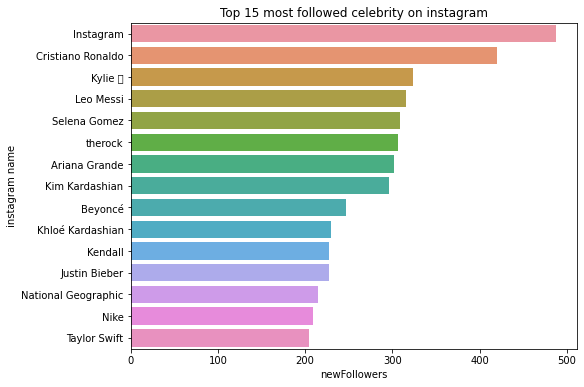

In [33]:
plt.figure(figsize =(8, 6))
plt.title('Top 15 most followed celebrity on instagram')
plt.xlabel('Followers in Million')
sns.barplot(y='instagram name',x='newFollowers',data=df_i.sort_values(by='newFollowers',ascending=False).head(15))

In [34]:
pallete=['red','green','yellow','salmon','cyan','blue','orange']

In [35]:
def plot(df):
    plt.figure(figsize=(8,6))
    plt.xlabel('number of times category occured')
    plt.ylabel('Category')
    df['Category'].value_counts().sort_values(ascending=True).plot.barh(color=pallete)

TOP categories followed on instagram

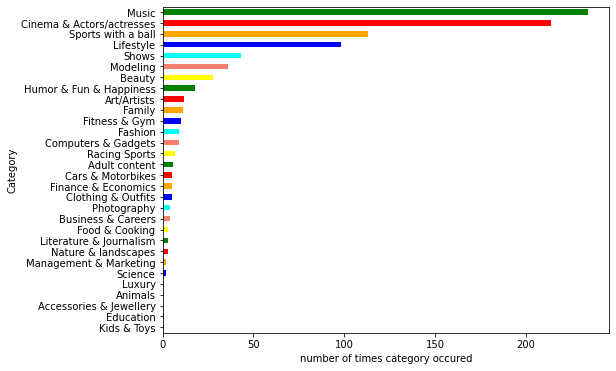

In [37]:
plot(df_i)

TOP categories followed on YOUTUBE

In [38]:
df_y.drop_duplicates(subset=['channel name'],inplace=True)

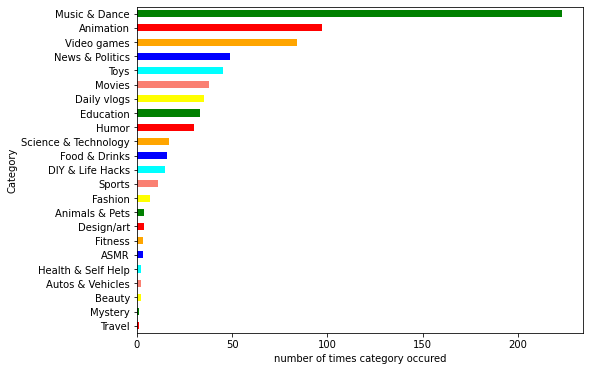

In [39]:
plot(df_y)

In [40]:
def plot_c(df):
    plt.figure(figsize=(10,8))
    plt.xlabel('number of times category occured')
    df['Audience Country'].value_counts().sort_values().plot.barh(color=pallete)

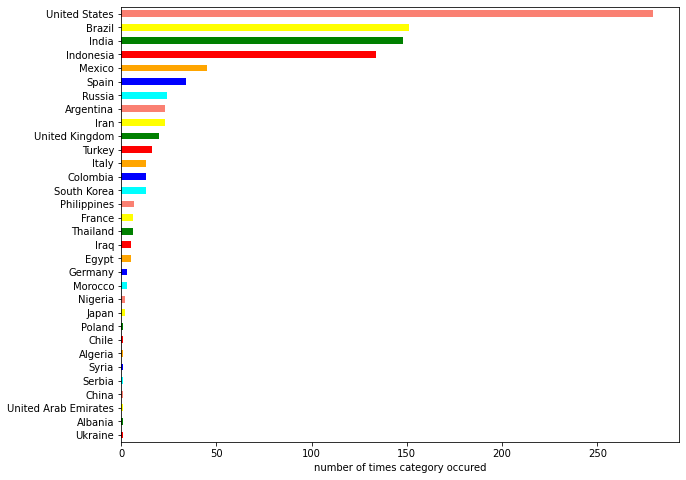

In [41]:
plot_c(df_i)

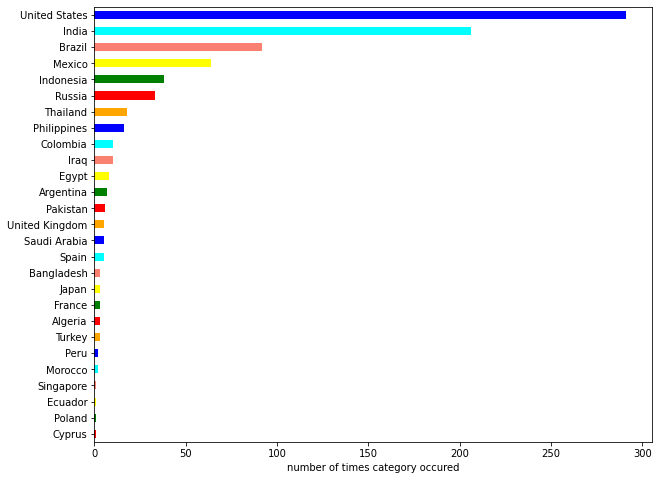

In [42]:
plot_c(df_y)

In [43]:
def demand(data,category):
    return data[data['Category']==category]['Audience Country'].value_counts().sort_values(ascending=True).plot.barh(color=pallete)

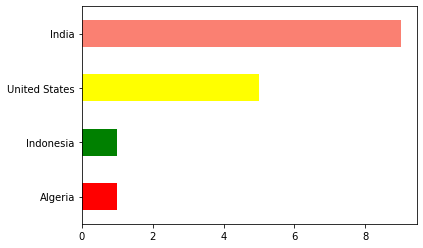

In [44]:
demand(df_y,'Education')

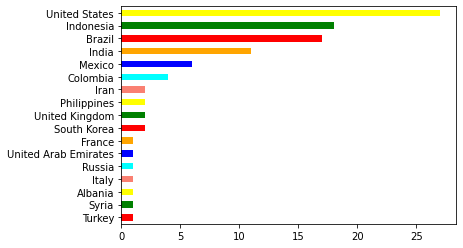

In [45]:
demand(df_i,'Lifestyle')

In [46]:
def for_mega_followers_instagram(coun,cat):
    df1=df_i[df_i['Audience Country']==coun]
    df1_mini=df1[df1['newFollowers']>60]
    return df1_mini.sort_values(by='Engagement Rate',ascending=False).groupby('Category').get_group(cat).iloc[:,[0,3,-1]]
    

In [48]:
for_mega_followers_instagram('United States','Music')

,instagram name,Followers,Engagement Rate
111,badgalriri,125.1M,3.677
133,BILLIE EILISH,101.7M,3.343
372,Cardi B,127.2M,2.594
126,Beyoncé,246.9M,1.499
814,Selena Gomez,308.2M,1.428
87,Ariana Grande,302.3M,1.356
460,Justin Timberlake,64.2M,0.674
630,Miley Cyrus,163.8M,0.363
680,Barbie,181.6M,0.339
225,Demi Lovato,128.7M,0.325


In [50]:
def for_mini_followers_instagram(coun,cat):
    df1=df_i[df_i['Audience Country']==coun]
    df1_mini=df1[df1['newFollowers']<60]
    return df1_mini.sort_values(by='Engagement Rate',ascending=False).groupby('Category').get_group(cat).iloc[:,[0,3,-1]]
    

In [51]:
for_mini_followers_instagram('United States','Beauty')

,instagram name,Followers,Engagement Rate
394,Marzia Kjellberg,8.2M,8.599
686,Nikita,9.1M,6.177
725,Phoebe Tonkin,8.2M,4.129
23,NaN,40.5M,3.951
687,NikkieTutorials,15.6M,3.080
105,avani,18.8M,2.404
407,James Charles,23.3M,1.854
820,Shay Mitchell,32.6M,1.308


In [52]:
for_mini_followers_instagram('India','Sports with a ball')

,instagram name,Followers,Engagement Rate
653,Nani,4.8M,11.646
836,Smriti Mandhana,5.9M,10.808
825,Shreyas Iyer,5.9M,9.758
774,Rishabh Pant,6.1M,9.666
752,KL Rahul👑,11.9M,6.626
343,Hardik Himanshu Pandya,20.6M,5.340
785,Rohit Sharma,23.3M,5.150
15,AB de Villiers,17.2M,3.581
222,David Warner,9.1M,3.074
822,Shikhar Dhawan,10.8M,2.763
